In [622]:
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
pd.plotting.backend = "matplotlib"
from math import floor, ceil


In [623]:
plt.rcParams['xtick.labelsize'] = 8.3

In [624]:
# import matplotlib
# matplotlib.use('Agg')  # Use a non-interactive backend
# import matplotlib.pyplot as plt
# plt.switch_backend('Agg')  # Switch backend if needed


In [625]:
Customer = pd.read_csv('Customers.csv', encoding='mac_roman')
Exchange = pd.read_csv('Exchange_Rates.csv', encoding='mac_roman')
Products = pd.read_csv('Products.csv', encoding='mac_roman')
Sales = pd.read_csv('Sales.csv', encoding='mac_roman')
Stores = pd.read_csv('Stores.csv', encoding='mac_roman')


In [626]:
Exchange.info()
Exchange["Date"] = pd.to_datetime(Exchange["Date"], format="%m/%d/%Y")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [627]:
Sales.info()
Sales["Order Date"] = pd.to_datetime(Sales["Order Date"], format="%m/%d/%Y")
Sales['YearMonth'] = Sales['Order Date'].dt.to_period('M') # Format: YYYY-MM (as a Period)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [628]:
Customer.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [629]:
Exchange.head()

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


In [630]:
Products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [631]:
Products["Unit Cost USD"] = Products["Unit Cost USD"].str.lstrip("$").str.replace(",", "").astype(float)
Products["Unit Price USD"] = Products["Unit Price USD"].str.lstrip("$").str.replace(",", "").astype(float)

In [632]:
Products['Profit'] = Products['Unit Price USD'] - Products['Unit Cost USD']
Products['Percent Profit'] = Products['Profit'] / Products['Unit Cost USD']

In [633]:
Sales.head(20)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,YearMonth
0,366000,1,2016-01-01,NaN,265598,10,1304,1,CAD,2016-01
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD,2016-01
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD,2016-01
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD,2016-01
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD,2016-01
5,366002,3,2016-01-01,1/12/2016,266019,0,1080,4,CAD,2016-01
6,366004,1,2016-01-01,NaN,1107461,38,163,6,GBP,2016-01
7,366004,2,2016-01-01,NaN,1107461,38,1529,2,GBP,2016-01
8,366005,1,2016-01-01,NaN,844003,33,421,4,EUR,2016-01
9,366007,1,2016-01-01,NaN,2035771,43,1617,1,USD,2016-01


In [634]:
Stores.head(-1)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
61,62,United States,South Dakota,1120.0,6/3/2018
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012


In [635]:
all_dfs = [Customer, Exchange, Products, Sales, Stores]
for df in all_dfs:
    print(f"DataFrame: {df.shape[0]} rows, {df.shape[1]} columns")
    print(df.isna().sum(), "\n")

DataFrame: 15266 rows, 10 columns
CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64 

DataFrame: 11215 rows, 3 columns
Date        0
Currency    0
Exchange    0
dtype: int64 

DataFrame: 2517 rows, 12 columns
ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Profit            0
Percent Profit    0
dtype: int64 

DataFrame: 62884 rows, 10 columns
Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
YearMonth            0
dtype: int64 

DataFrame: 67 rows, 5 columns
StoreKey         0
Country          0
State            0
Square Meters    1
Open Dat

In [636]:
Stores.columns

Index(['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date'], dtype='object')

In [637]:
Sales_in_Store = Sales.merge(Stores, on='StoreKey', how='left')

In [638]:
Sales_in_Store.head(20)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,YearMonth,Country,State,Square Meters,Open Date
0,366000,1,2016-01-01,NaN,265598,10,1304,1,CAD,2016-01,Canada,Nunavut,1210.0,4/4/2015
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD,2016-01,Online,Online,NaN,1/1/2010
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD,2016-01,Online,Online,NaN,1/1/2010
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD,2016-01,Online,Online,NaN,1/1/2010
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD,2016-01,Online,Online,NaN,1/1/2010
5,366002,3,2016-01-01,1/12/2016,266019,0,1080,4,CAD,2016-01,Online,Online,NaN,1/1/2010
6,366004,1,2016-01-01,NaN,1107461,38,163,6,GBP,2016-01,United Kingdom,Belfast,1800.0,4/4/2015
7,366004,2,2016-01-01,NaN,1107461,38,1529,2,GBP,2016-01,United Kingdom,Belfast,1800.0,4/4/2015
8,366005,1,2016-01-01,NaN,844003,33,421,4,EUR,2016-01,Netherlands,Friesland,1540.0,12/9/2015
9,366007,1,2016-01-01,NaN,2035771,43,1617,1,USD,2016-01,United States,Alaska,1190.0,1/1/2015


In [639]:
Sales_Store_Products = Sales_in_Store.merge(Products, on='ProductKey', how='left')

In [640]:
Products.iloc[1047]

ProductKey                                   1048
Product Name      A. Datum SLR Camera X136 Silver
Brand                                    A. Datum
Color                                      Silver
Unit Cost USD                              141.47
Unit Price USD                              427.0
SubcategoryKey                                402
Subcategory                   Digital SLR Cameras
CategoryKey                                     4
Category                   Cameras and camcorders
Profit                                     285.53
Percent Profit                           2.018308
Name: 1047, dtype: object

In [641]:
Sales_Store_Products['Profit'] = (Sales_Store_Products['Unit Price USD'] - Sales_Store_Products['Unit Cost USD']) * Sales_Store_Products['Quantity']
Sales_Store_Products['Percent Profit'] = Sales_Store_Products['Profit'] / Sales_Store_Products['Unit Cost USD']

In [642]:
Sales_Store_Products.head(20)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,YearMonth,...,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Profit,Percent Profit
0,366000,1,2016-01-01,NaN,265598,10,1304,1,CAD,2016-01,...,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,36.73,1.174608
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD,2016-01,...,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,571.06,4.036616
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD,2016-01,...,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,445.30,2.018220
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD,2016-01,...,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,1217.44,8.221502
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD,2016-01,...,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,159.80,0.961492
5,366002,3,2016-01-01,1/12/2016,266019,0,1080,4,CAD,2016-01,...,Contoso,Silver,214.03,646.00,402,Digital SLR Cameras,4,Cameras and camcorders,1727.88,8.073074
6,366004,1,2016-01-01,NaN,1107461,38,163,6,GBP,2016-01,...,Adventure Works,White,527.53,1592.20,201,Televisions,2,TV and Video,6388.02,12.109302
7,366004,2,2016-01-01,NaN,1107461,38,1529,2,GBP,2016-01,...,The Phone Company,Black,117.27,255.00,504,Smart phones & PDAs,5,Cell phones,275.46,2.348938
8,366005,1,2016-01-01,NaN,844003,33,421,4,EUR,2016-01,...,Adventure Works,Silver,215.68,469.00,303,Desktops,3,Computers,1013.28,4.698071
9,366007,1,2016-01-01,NaN,2035771,43,1617,1,USD,2016-01,...,Contoso,Silver,26.67,57.99,602,Movie DVD,6,"Music, Movies and Audio Books",31.32,1.174353


In [643]:
Profit_Store_Sum = Sales_Store_Products.groupby(["StoreKey"])[["Profit"]].sum().reset_index()#.sum().sort_values(by="Profit", ascending=False) , "Percent Profit"

In [644]:
Qunat_Store_Sum = Sales_Store_Products.groupby(["StoreKey"])[["Quantity"]].sum().reset_index()

In [645]:
avg_profit_per_store = Sales_Store_Products.groupby(["StoreKey"])[["Profit"]].mean().reset_index()
avg_profit_per_store

,StoreKey,Profit
0,0,506.850941
1,1,484.094658
2,2,528.478333
3,4,618.031671
4,5,571.701222
...,...,...
53,62,503.527429
54,63,510.863914
55,64,550.838130
56,65,509.926007


C:\Users\cypri\AppData\Local\Temp\ipykernel_20804\3428490639.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '8'),
 Text(7, 0, '9'),
 Text(8, 0, '10'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '16'),
 Text(14, 0, '17'),
 Text(15, 0, '18'),
 Text(16, 0, '19'),
 Text(17, 0, '20'),
 Text(18, 0, '21'),
 Text(19, 0, '22'),
 Text(20, 0, '23'),
 Text(21, 0, '24'),
 Text(22, 0, '26'),
 Text(23, 0, '27'),
 Text(24, 0, '28'),
 Text(25, 0, '29'),
 Text(26, 0, '30'),
 Text(27, 0, '31'),
 Text(28, 0, '32'),
 Text(29, 0, '33'),
 Text(30, 0, '34'),
 Text(31, 0, '36'),
 Text(32, 0, '37'),
 Text(33, 0, '38'),
 Text(34, 0, '39'),
 Text(35, 0, '40'),
 Text(36, 0, '41'),
 Text(37, 0, '42'),
 Text(38, 0, '43'),
 Text(39, 0, '44'),
 Text(40, 0, '45'),
 Text(41, 0, '47'),
 Text(42, 0, '48'),
 Text(43, 0, '49'),
 Text(44, 0, '50'),
 Text(45, 0, '51'),
 Text(46, 0, '53'),
 Text(47, 0, '54'),
 Text(48, 0, '55'),
 Text(49, 0, '56'),
 Text(50, 0, '57')

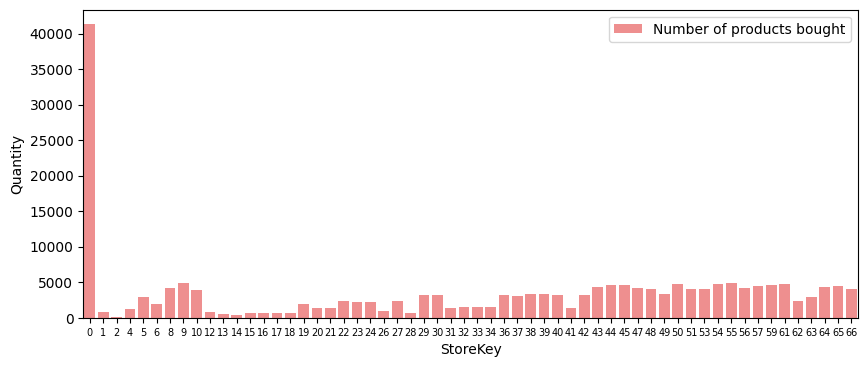

In [646]:
# fig, ax = plt.subplots()
# fig.set_size_inches(12, 6)
# ax.bar(Profit_Store_Sum["StoreKey"], Profit_Store_Sum["Profit"], width = width, label = 'Profit')
# plt.bar(Qunat_Store_Sum[~AUX]["StoreKey"], Qunat_Store_Sum[~AUX]["Quantity"], label = 'Number of Products Sold')
# plt.show()
plt.figure(figsize=(10,4))
ax = sns.barplot(x="StoreKey", y="Quantity", data=Qunat_Store_Sum, color='red', label='Number of products bought', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"

C:\Users\cypri\AppData\Local\Temp\ipykernel_20804\336270986.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '4'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '8'),
 Text(6, 0, '9'),
 Text(7, 0, '10'),
 Text(8, 0, '12'),
 Text(9, 0, '13'),
 Text(10, 0, '14'),
 Text(11, 0, '15'),
 Text(12, 0, '16'),
 Text(13, 0, '17'),
 Text(14, 0, '18'),
 Text(15, 0, '19'),
 Text(16, 0, '20'),
 Text(17, 0, '21'),
 Text(18, 0, '22'),
 Text(19, 0, '23'),
 Text(20, 0, '24'),
 Text(21, 0, '26'),
 Text(22, 0, '27'),
 Text(23, 0, '28'),
 Text(24, 0, '29'),
 Text(25, 0, '30'),
 Text(26, 0, '31'),
 Text(27, 0, '32'),
 Text(28, 0, '33'),
 Text(29, 0, '34'),
 Text(30, 0, '36'),
 Text(31, 0, '37'),
 Text(32, 0, '38'),
 Text(33, 0, '39'),
 Text(34, 0, '40'),
 Text(35, 0, '41'),
 Text(36, 0, '42'),
 Text(37, 0, '43'),
 Text(38, 0, '44'),
 Text(39, 0, '45'),
 Text(40, 0, '47'),
 Text(41, 0, '48'),
 Text(42, 0, '49'),
 Text(43, 0, '50'),
 Text(44, 0, '51'),
 Text(45, 0, '53'),
 Text(46, 0, '54'),
 Text(47, 0, '55'),
 Text(48, 0, '56'),
 Text(49, 0, '57'),
 Text(50, 0, '59'

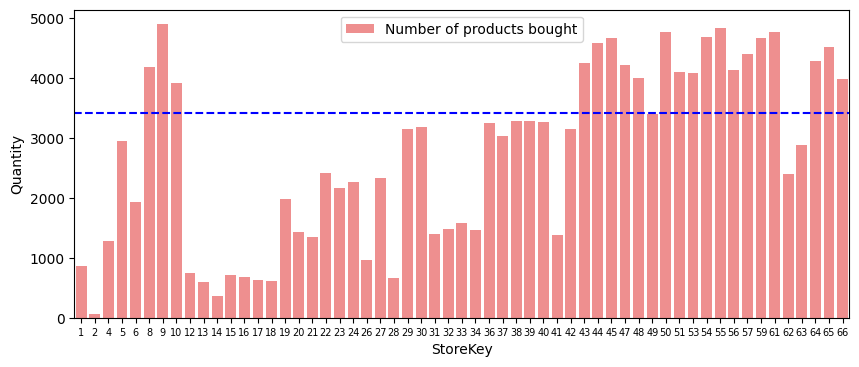

In [647]:
AUX = Qunat_Store_Sum.index.isin([0])
plt.figure(figsize=(10,4))
ax = sns.barplot(x="StoreKey", y="Quantity", data=Qunat_Store_Sum[~AUX], color='red', label='Number of products bought', alpha=0.5)
avg_quantity = Qunat_Store_Sum["Quantity"].mean()
ax.axhline(avg_quantity, color='blue', linestyle='--', label='Average Quantity Sold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"

In [648]:
Qunat_Store_Sum.groupby("StoreKey")["Quantity"].mean().sort_values(ascending=False)
Qunat_Store_Sum["Quantity"].mean()
Qunat_Store_Sum[Qunat_Store_Sum["Quantity"] > Qunat_Store_Sum["Quantity"].mean()]

,StoreKey,Quantity
0,0,41311
6,8,4188
7,9,4894
8,10,3909
38,43,4258
...,...,...
51,59,4674
52,61,4771
55,64,4289
56,65,4524


In [649]:
high_quant_stores = [8,9,10,43,44,45,47,48,49,50,51,53,54,55,56,57,59,61,64,65,66]#Except for store 0, which is the warehouse/online store


C:\Users\cypri\AppData\Local\Temp\ipykernel_20804\3629911557.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '8'),
 Text(7, 0, '9'),
 Text(8, 0, '10'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '16'),
 Text(14, 0, '17'),
 Text(15, 0, '18'),
 Text(16, 0, '19'),
 Text(17, 0, '20'),
 Text(18, 0, '21'),
 Text(19, 0, '22'),
 Text(20, 0, '23'),
 Text(21, 0, '24'),
 Text(22, 0, '26'),
 Text(23, 0, '27'),
 Text(24, 0, '28'),
 Text(25, 0, '29'),
 Text(26, 0, '30'),
 Text(27, 0, '31'),
 Text(28, 0, '32'),
 Text(29, 0, '33'),
 Text(30, 0, '34'),
 Text(31, 0, '36'),
 Text(32, 0, '37'),
 Text(33, 0, '38'),
 Text(34, 0, '39'),
 Text(35, 0, '40'),
 Text(36, 0, '41'),
 Text(37, 0, '42'),
 Text(38, 0, '43'),
 Text(39, 0, '44'),
 Text(40, 0, '45'),
 Text(41, 0, '47'),
 Text(42, 0, '48'),
 Text(43, 0, '49'),
 Text(44, 0, '50'),
 Text(45, 0, '51'),
 Text(46, 0, '53'),
 Text(47, 0, '54'),
 Text(48, 0, '55'),
 Text(49, 0, '56'),
 Text(50, 0, '57')

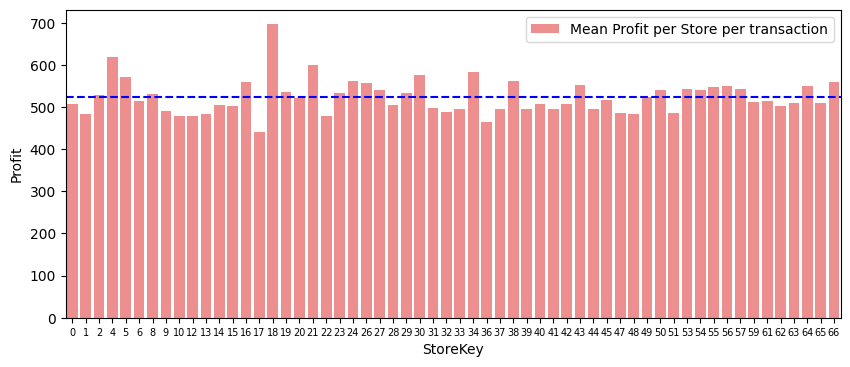

In [650]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x="StoreKey", y="Profit", data=avg_profit_per_store, color='red', label='Mean Profit per Store per transaction', alpha=0.5)
ax.axhline(avg_profit_per_store["Profit"].mean(), color='blue', linestyle='--', label='Average value')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"

In [651]:
print(Exchange["Date"].min(), Sales["Order Date"].min(),"\n", Exchange["Date"].max(), Sales["Order Date"].max())

2015-01-01 00:00:00 2016-01-01 00:00:00 
 2021-02-20 00:00:00 2021-02-20 00:00:00


In [652]:
Stores.set_index("StoreKey", inplace=True)
Qunat_Store_Sum.set_index("StoreKey", inplace=True)
avg_profit_per_store.set_index("StoreKey", inplace=True)

In [653]:
Stores["average_profit"] = avg_profit_per_store["Profit"]
Stores["Quantity"] = Qunat_Store_Sum["Quantity"]

In [654]:
pd.set_option("display.max_rows", None)  
# Stores.groupby(["Country"]).apply(lambda x: x, include_groups=False)#.StoreKey.isin(high_quant_stores)
result = (
    Stores.groupby(["Country"])
    .apply(lambda x: x, include_groups=False)
    .query("StoreKey in @high_quant_stores")
)
result

State  Square Meters   Open Date  \
Country       StoreKey                                                         
Canada        8         Newfoundland and Labrador         2105.0    7/2/2014   
              9             Northwest Territories         1500.0    3/4/2005   
              10                          Nunavut         1210.0    4/4/2015   
United States 43                           Alaska         1190.0    1/1/2015   
              44                         Arkansas         2000.0    6/3/2010   
              45                      Connecticut         2000.0    7/8/2007   
              47                           Hawaii         1120.0    4/4/2015   
              48                            Idaho         1540.0  12/15/2012   
              49                             Iowa         2000.0    6/3/2018   
              50                           Kansas         2000.0    3/6/2008   
              51                            Maine         1295.0    1/1/2010   
              53                          Montana         1260.0    6/6/2012   
              54                         Nebraska         2000.0    6/7/2013   
              55                           Nevada         2000.0  12/15/2009   
              56                    New Hampshire         1260.0    1/1/2015   
              57                       New Mexico         1645.0    6/3/2010   
              59                           Oregon         2000.0    8/8/2012   
              61                   South Carolina         2000.0  12/15/2012   
              64                    Washington DC         1330.0    1/1/2010   
              65                    West Virginia         1785.0    1/1/2012   
              66                          Wyoming          840.0    1/1/2014   

                        average_profit  Quantity  
Country       StoreKey                            
Canada        8             531.677360    4188.0  
              9             491.285701    4894.0  
              10            477.777147    3909.0  
United States 43            553.054478    4258.0  
              44            495.127396    4581.0  
              45            517.519932    4672.0  
              47            486.392953    4220.0  
              48            482.737161    3995.0  
              49            524.971172    3405.0  
              50            539.604424    4773.0  
              51            486.597559    4095.0  
              53            542.649525    4078.0  
              54            540.921268    4686.0  
              55            547.135540    4826.0  
              56            549.830303    4130.0  
              57            543.755728    4407.0  
              59            512.705380    4674.0  
              61            515.149630    4771.0  
              64            550.838130    4289.0  
              65            509.926007    4524.0  
              66            558.448039    3986.0

In [655]:
result["Square Meters"].describe(), Stores["Square Meters"].describe()

(count      21.000000
 mean     1622.857143
 std       393.651405
 min       840.000000
 25%      1260.000000
 50%      1645.000000
 75%      2000.000000
 max      2105.000000
 Name: Square Meters, dtype: float64,
 count      66.000000
 mean     1402.196970
 std       576.404058
 min       245.000000
 25%      1108.750000
 50%      1347.500000
 75%      2000.000000
 max      2105.000000
 Name: Square Meters, dtype: float64)

In [656]:
Sales_Store_Products.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'YearMonth', 'Country', 'State', 'Square Meters', 'Open Date',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Profit',
       'Percent Profit'],
      dtype='object')

In [657]:
pd.set_option("display.max_rows", 20)  
Sales_Store_Products['Order Date'] = pd.to_datetime(Sales_Store_Products['Order Date'])

# Extract Year and Month into a new column (e.g., 'YearMonth')
Sales_Store_Products['Month'] = Sales_Store_Products['Order Date'].dt.month  
Sales_Store_Products['Year'] = Sales_Store_Products['Order Date'].dt.year 

In [658]:
# X.loc[~X['Education_Level'].isin(['Unknown', 'Uneducated']), 'Education_Level'] = 'Other'
Sales_Store_Products_AUX = Sales_Store_Products
Sales_Store_Products_AUX["StoreKey"].astype(str)


0        10
1         0
2         0
3         0
4         0
         ..
62879    43
62880     0
62881     0
62882     0
62883     0
Name: StoreKey, Length: 62884, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Online'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Italy'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'France')])

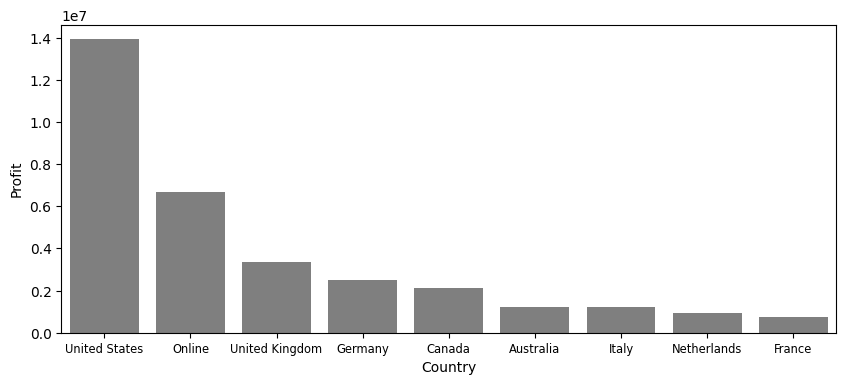

In [659]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x="Country", y="Profit", data=Sales_Store_Products_AUX.groupby(['Country'])['Profit'].sum().sort_values(ascending=False).reset_index(),alpha=0.5, color='black')
plt.xticks(fontsize=8.3)

In [660]:
AUX = Sales_Store_Products_AUX.groupby(['StoreKey', 'Country'])['Profit'].sum().reset_index().groupby(['Country'])['Profit'].mean().sort_values(ascending=False).reset_index()
AUX

,Country,Profit
0,Online,6.672693e+06
1,Canada,7.013793e+05
2,United States,6.961080e+05
3,United Kingdom,4.787858e+05
4,Italy,4.030313e+05
5,Germany,3.120668e+05
6,Australia,2.487260e+05
7,Netherlands,2.344413e+05
8,France,1.035964e+05


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Online'),
  Text(1, 0, 'Canada'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Netherlands'),
  Text(8, 0, 'France')])

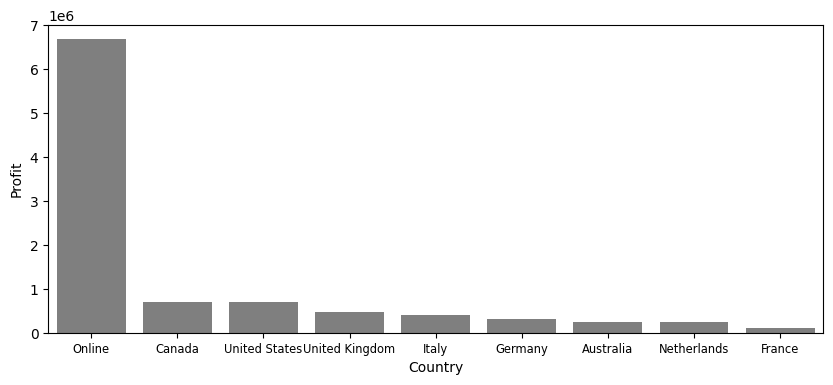

In [661]:

plt.figure(figsize=(10,4))
ax = sns.barplot(x="Country", y="Profit", data=AUX,alpha=0.5, color='black')
plt.xticks(fontsize=8.3)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Netherlands'),
  Text(7, 0, 'France')])

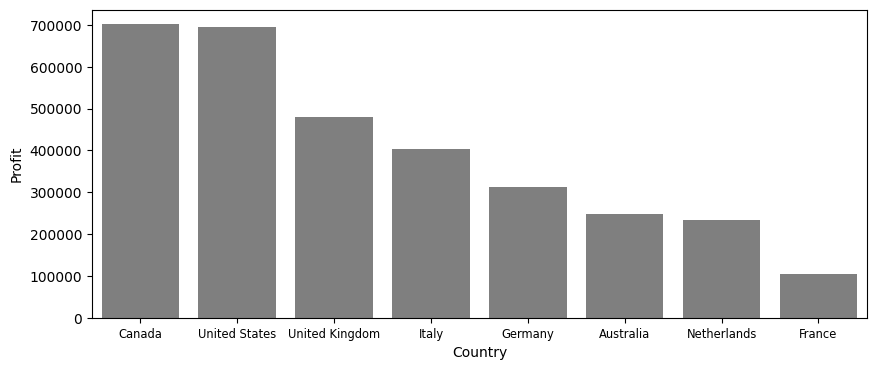

In [662]:
plt.figure(figsize=(10,4))
sns.barplot(x="Country", y="Profit", data=AUX,alpha=0.5, color='black', order = ["Canada", "United States", "United Kingdom","Italy", "Germany","Australia","Netherlands", "France"])
plt.xticks(fontsize=8.3)

In [663]:
Sales_Store_Products_AUX.loc[~Sales_Store_Products['StoreKey'].isin([0]), 'StoreKey'] = 'In-Store'
Sales_Store_Products_AUX.loc[Sales_Store_Products['StoreKey'].isin([0]), 'StoreKey'] = 'Online'

C:\Users\cypri\AppData\Local\Temp\ipykernel_20804\231490152.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'In-Store' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Sales_Store_Products_AUX.loc[~Sales_Store_Products['StoreKey'].isin([0]), 'StoreKey'] = 'In-Store'


In [664]:
Sales_Store_Products_AUX.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,YearMonth,...,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Profit,Percent Profit,Month,Year
0,366000,1,2016-01-01,NaN,265598,In-Store,1304,1,CAD,2016-01,...,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,36.73,1.174608,1,2016
1,366001,1,2016-01-01,1/13/2016,1269051,Online,1048,2,USD,2016-01,...,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,571.06,4.036616,1,2016
2,366001,2,2016-01-01,1/13/2016,1269051,Online,2007,1,USD,2016-01,...,220.64,665.94,803,Microwaves,8,Home Appliances,445.30,2.018220,1,2016
3,366002,1,2016-01-01,1/12/2016,266019,Online,1106,7,CAD,2016-01,...,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,1217.44,8.221502,1,2016
4,366002,2,2016-01-01,1/12/2016,266019,Online,373,1,CAD,2016-01,...,166.20,326.00,301,Laptops,3,Computers,159.80,0.961492,1,2016


In [665]:
Sales_Store_Products_AUX.groupby(['Country'])['Profit'].sum().sort_values(ascending=False)

Country
United States     13922159.05
Online             6672692.64
United Kingdom     3351500.32
Germany            2496534.61
Canada             2104137.96
Australia          1243629.87
Italy              1209093.91
Netherlands         937765.36
France              725174.66
Name: Profit, dtype: float64

In [666]:
# Group by Store and YearMonth, then calculate mean Quantity
monthly_avg_sales = Sales_Store_Products_AUX.groupby(['Month', 'StoreKey'])['Quantity'].sum().reset_index()
yearly_avg_sales = Sales_Store_Products_AUX.groupby(['Year', 'StoreKey'])['Quantity'].sum().reset_index()
monthly_avg_sales,yearly_avg_sales

(    Month  StoreKey  Quantity
 0       1  In-Store     19378
 1       1    Online      4640
 2       2  In-Store     21485
 3       2    Online      5426
 4       3  In-Store      6987
 ..    ...       ...       ...
 19     10    Online      3354
 20     11  In-Store     12710
 21     11    Online      3442
 22     12  In-Store     21144
 23     12    Online      5970
 
 [24 rows x 3 columns],
     Year  StoreKey  Quantity
 0   2016  In-Store     18148
 1   2016    Online      3613
 2   2017  In-Store     19902
 3   2017    Online      4896
 4   2018  In-Store     35256
 5   2018    Online      9242
 6   2019  In-Store     53635
 7   2019    Online     14805
 8   2020  In-Store     26745
 9   2020    Online      7718
 10  2021  In-Store      2760
 11  2021    Online      1037)

<Axes: xlabel='Month', ylabel='Quantity'>

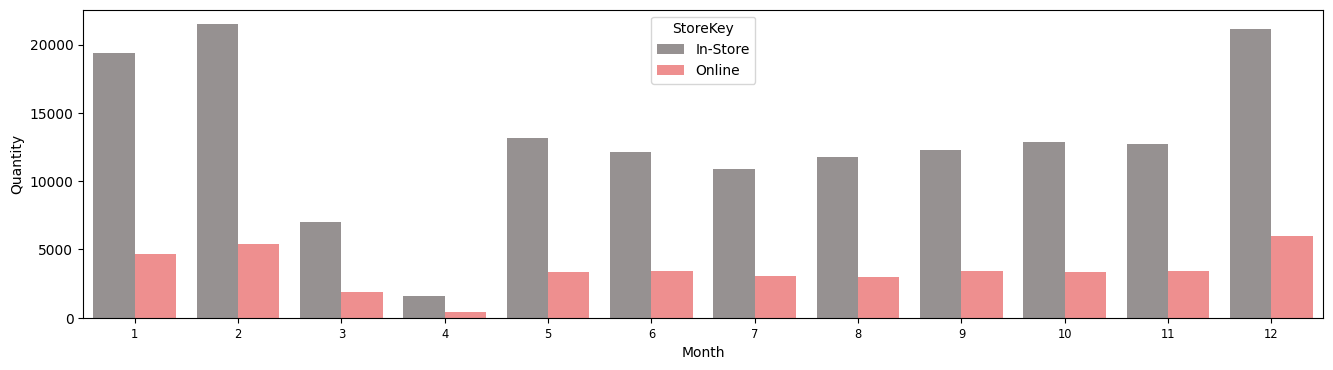

In [667]:
plt.figure(figsize=(16,4))
sns.barplot(x="Month", y="Quantity", data=monthly_avg_sales,palette='dark:red', alpha=0.5, hue = 'StoreKey')#label='Volume per month per Store'

<Axes: xlabel='Year', ylabel='Quantity'>

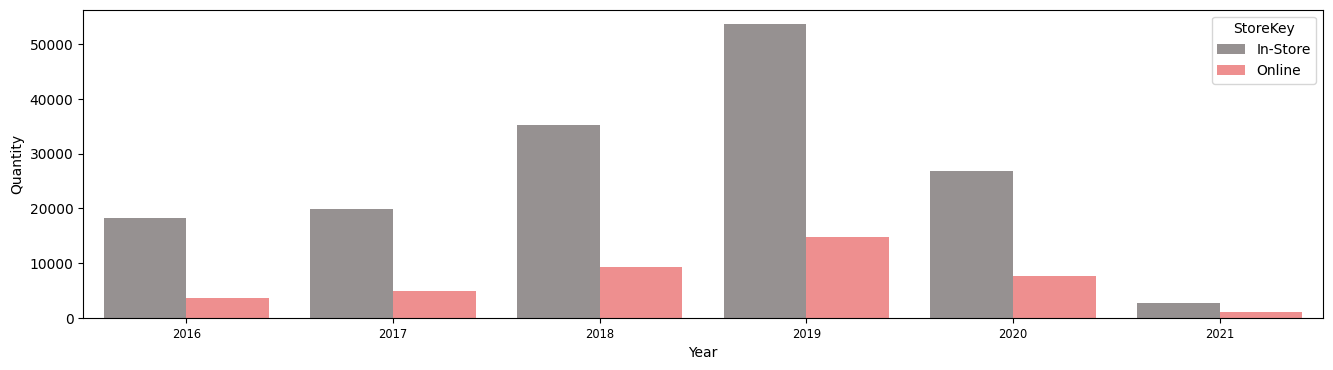

In [668]:
plt.figure(figsize=(16,4))
sns.barplot(x="Year", y="Quantity", data=yearly_avg_sales,palette='dark:red', alpha=0.5, hue = 'StoreKey')#label='Volume per month per Store'

In [669]:
Sales_Store_Products.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'YearMonth', 'Country', 'State', 'Square Meters', 'Open Date',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Profit',
       'Percent Profit', 'Month', 'Year'],
      dtype='object')

In [670]:
al_clients =  Sales_Store_Products.groupby(["CustomerKey"])["Profit"].sum().count()
zero_2_clients = floor(al_clients * 0.2)
other = ceil(al_clients * 0.8)
Sales_Store_Products.groupby(["CustomerKey"])["Profit"].sum().value_counts(ascending=False).head(zero_2_clients).sum() - Sales_Store_Products.groupby(["CustomerKey"])["Profit"].sum().value_counts(ascending=False).tail(other).sum()


np.int64(-6441)

In [671]:
Sales_Store_Products.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'YearMonth', 'Country', 'State', 'Square Meters', 'Open Date',
       'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD',
       'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category', 'Profit',
       'Percent Profit', 'Month', 'Year'],
      dtype='object')

In [672]:
Sales_Store_Products.groupby(["Category","Subcategory"])["Profit"].apply(lambda x: x.sum()).reset_index().sort_values(by="Profit", ascending=False).head(20)

,Category,Subcategory,Profit
12,Computers,Desktops,5629155.33
30,TV and Video,Televisions,2631908.38
16,Computers,Projectors & Screens,2357342.37
26,Home Appliances,Water Heaters,2039982.30
3,Cameras and camcorders,Camcorders,2018119.70
27,"Music, Movies and Audio Books",Movie DVD,1909259.17
13,Computers,Laptops,1793677.71
10,Cell phones,Touch Screen Phones,1738593.81
9,Cell phones,Smart phones & PDAs,1590479.02
24,Home Appliances,Refrigerators,1316366.73


In [673]:
Sales_by_category = Sales_Store_Products.groupby(["Category"])["Profit"].sum().reset_index().sort_values(by="Profit", ascending=False).head(20)

In [674]:
Sales_by_subcategory = Sales_Store_Products.groupby(["Category", "Subcategory"])["Profit"].sum().reset_index().sort_values(by="Profit", ascending=False)

<Axes: xlabel='Category', ylabel='Profit'>

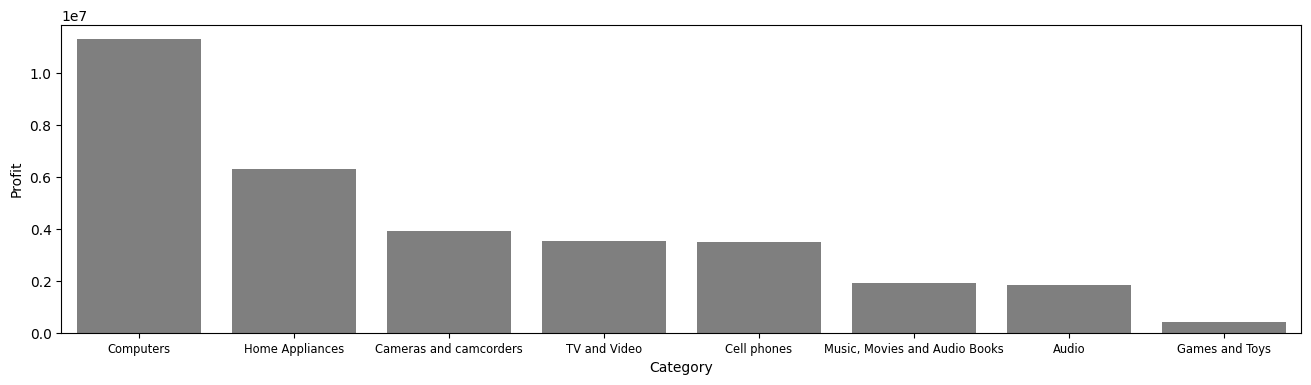

In [675]:
plt.figure(figsize=(16,4))
sns.barplot(x="Category", y="Profit", data=Sales_by_category,color='black', alpha=0.5)

In [677]:
number_of_products_by_category = Sales_Store_Products.groupby(["Category"])["ProductKey"].count().reset_index().sort_values(by="ProductKey", ascending=False)
number_of_products_by_subcategory = Sales_Store_Products.groupby(["Subcategory"])["ProductKey"].count().reset_index().sort_values(by="ProductKey", ascending=False)
number_of_products_by_category, number_of_products_by_subcategory

(                        Category  ProductKey
 3                      Computers       14025
 2                    Cell phones       10158
 6  Music, Movies and Audio Books        9169
 0                          Audio        7489
 4                 Games and Toys        7061
 5                Home Appliances        5865
 1         Cameras and camcorders        5559
 7                   TV and Video        3558,
              Subcategory  ProductKey
 21             Movie DVD        9169
 9               Desktops        6447
 1   Bluetooth Headphones        4327
 12        Download Games        3606
 2            Boxed Games        3455
 ..                   ...         ...
 15   Home Theater System         432
 13                  Fans         375
 16                 Lamps         370
 30      Washers & Dryers         352
 0       Air Conditioners         312
 
 [32 rows x 2 columns])

In [678]:
top_7_subcategories = number_of_products_by_subcategory['Subcategory'].value_counts().nlargest(7).index
number_of_products_by_subcategory['Subcategory'] = number_of_products_by_subcategory['Subcategory'].where(
    number_of_products_by_subcategory['Subcategory'].isin(top_7_subcategories), 
    'Other')


In [679]:
top_7_subcategories = Sales_by_subcategory['Subcategory'].value_counts().nlargest(7).index
Sales_by_subcategory['Subcategory'] = Sales_by_subcategory['Subcategory'].where(
    Sales_by_subcategory['Subcategory'].isin(top_7_subcategories), 
    'Other')


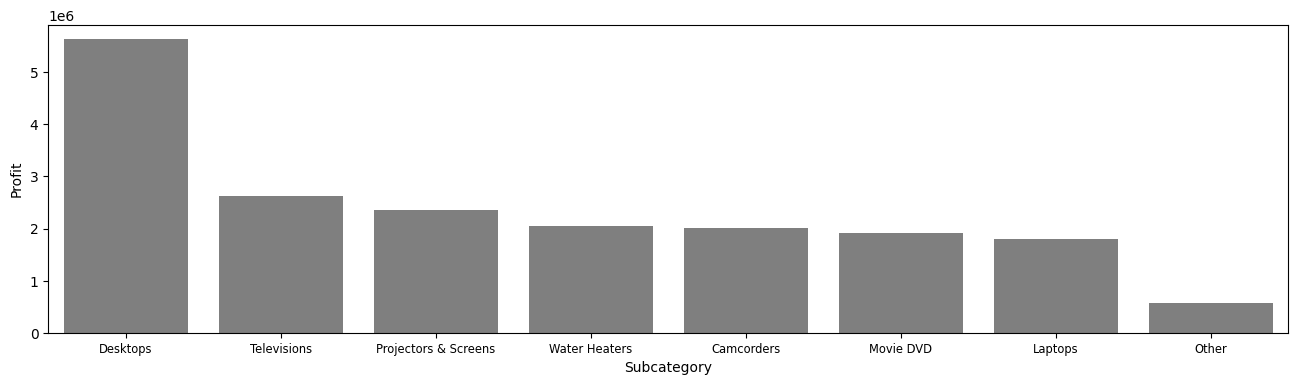

In [695]:
plt.figure(figsize=(16,4))
plt.xticks(fontsize=8.3)
ax = sns.barplot(x="Subcategory", y="Profit", data=Sales_by_subcategory,color='black', alpha=0.5, errorbar=None)
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=8.3)

In [681]:
number_of_products_by_category["Category"].value_counts().sort_values(ascending=False)

Category
Computers                        1
Cell phones                      1
Music, Movies and Audio Books    1
Audio                            1
Games and Toys                   1
Home Appliances                  1
Cameras and camcorders           1
TV and Video                     1
Name: count, dtype: int64

In [682]:
number_of_products_by_subcategory.head(8)

,Subcategory,ProductKey
21,Movie DVD,9169
9,Desktops,6447
1,Bluetooth Headphones,4327
12,Download Games,3606
2,Boxed Games,3455
28,Touch Screen Phones,3391
26,Smart phones & PDAs,3302
24,Other,2110


C:\Users\cypri\AppData\Local\Temp\ipykernel_20804\1671022467.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8.3)


[Text(0, 0, 'Movie DVD'),
 Text(1, 0, 'Desktops'),
 Text(2, 0, 'Bluetooth Headphones'),
 Text(3, 0, 'Download Games'),
 Text(4, 0, 'Boxed Games'),
 Text(5, 0, 'Touch Screen Phones'),
 Text(6, 0, 'Smart phones & PDAs'),
 Text(7, 0, 'Other')]

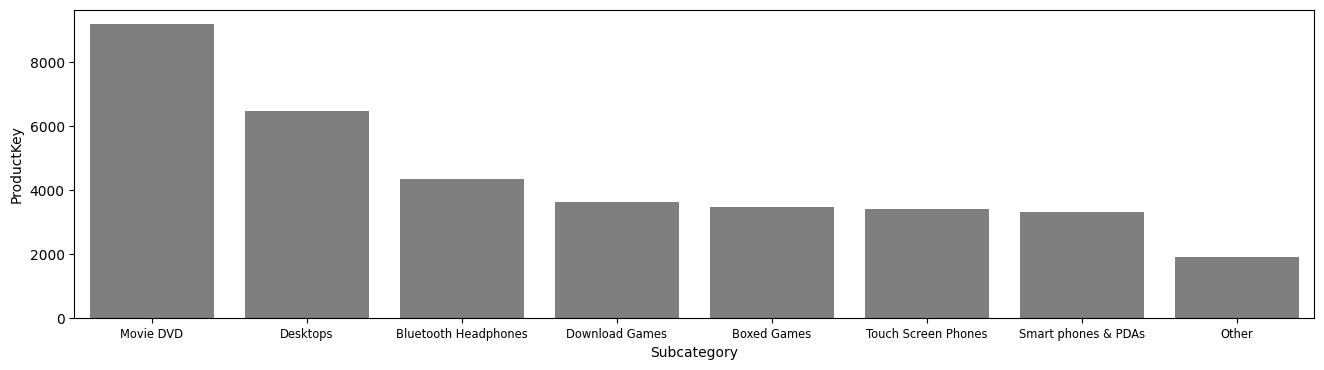

In [696]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x="Subcategory", y="ProductKey", data=number_of_products_by_subcategory.head(10),color='black', alpha=0.5, errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8.3)

In [684]:
Sales_by_category["number_of_products"] = number_of_products_by_category["ProductKey"]
Sales_by_subcategory["number_of_products"] = number_of_products_by_subcategory["ProductKey"]

In [685]:
Sales_by_subcategory["number_of_products"].head()

12    3606
30     352
16     370
26    3302
3     1403
Name: number_of_products, dtype: int64

In [686]:
Sales_by_category["Profit per Product"] = Sales_by_category["Profit"] / Sales_by_category["number_of_products"]
Sales_by_subcategory["Profit per Product"] = Sales_by_subcategory["Profit"] / Sales_by_subcategory["number_of_products"]

In [687]:
Sales_by_category["Profit per Product"].head(), Sales_by_subcategory["Profit per Product"].head()

(3     804.096107
 5    1073.544561
 1     705.126999
 7     994.011914
 2     344.420805
 Name: Profit per Product, dtype: float64,
 12    1561.052504
 30    7477.012443
 16    6371.195595
 26     617.802029
 3     1438.431718
 Name: Profit per Product, dtype: float64)

C:\Users\cypri\AppData\Local\Temp\ipykernel_20804\1725021811.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8.3)


[Text(0, 0, 'Home Appliances'),
 Text(1, 0, 'TV and Video'),
 Text(2, 0, 'Computers'),
 Text(3, 0, 'Cameras and camcorders'),
 Text(4, 0, 'Cell phones'),
 Text(5, 0, 'Audio'),
 Text(6, 0, 'Music, Movies and Audio Books'),
 Text(7, 0, 'Games and Toys')]

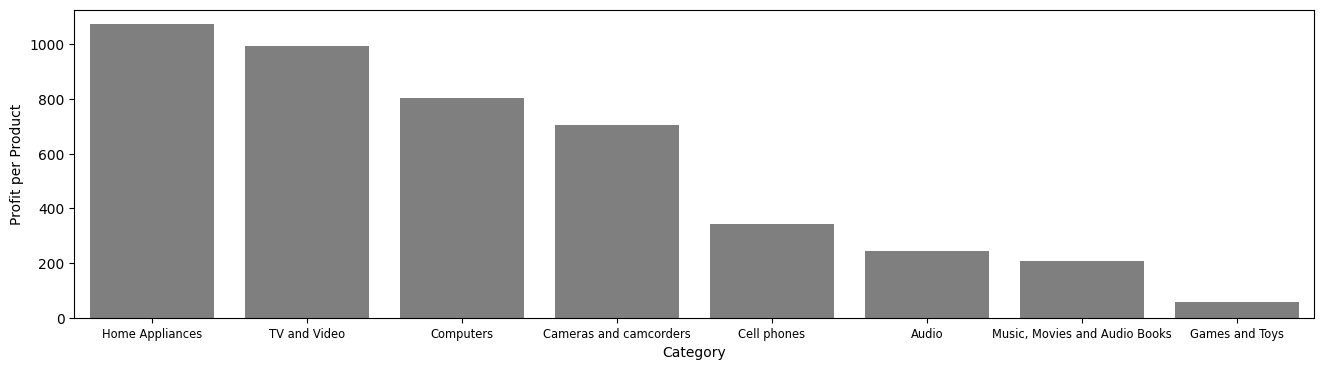

In [688]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x="Category", y="Profit per Product", data=Sales_by_category.sort_values(by="Profit per Product", ascending=False),color='black', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8.3)

In [689]:
Sales_by_subcategory

,Category,Subcategory,Profit,number_of_products,Profit per Product
12,Computers,Desktops,5629155.33,3606,1561.052504
30,TV and Video,Televisions,2631908.38,352,7477.012443
16,Computers,Projectors & Screens,2357342.37,370,6371.195595
26,Home Appliances,Water Heaters,2039982.30,3302,617.802029
3,Cameras and camcorders,Camcorders,2018119.70,1403,1438.431718
...,...,...,...,...,...
11,Computers,Other,118730.44,1337,88.803620
8,Cell phones,Other,93627.20,1526,61.354653
7,Cell phones,Other,75926.51,724,104.870870
21,Home Appliances,Other,53476.98,9169,5.832368


In [690]:
Sales_by_subcategory[["Profit per Product", "Subcategory"]].sort_values(by = "Profit per Product", ascending=False)

,Profit per Product,Subcategory
30,7477.012443,Televisions
16,6371.195595,Projectors & Screens
13,4783.140560,Laptops
0,2586.105833,Other
25,1665.532670,Other
...,...,...
11,88.803620,Other
1,64.686864,Other
8,61.354653,Other
17,32.461006,Other


In [691]:
Sales_by_subcategory["Subcategory"].value_counts()

Subcategory
Other                   25
Desktops                 1
Projectors & Screens     1
Televisions              1
Water Heaters            1
Camcorders               1
Movie DVD                1
Laptops                  1
Name: count, dtype: int64

In [692]:
order_of_bars = ["Televisions", "Projectors & Screens", "Laptops", "Desktops", "Camcorders", "Movie DVD","Water Heaters", "Other"]

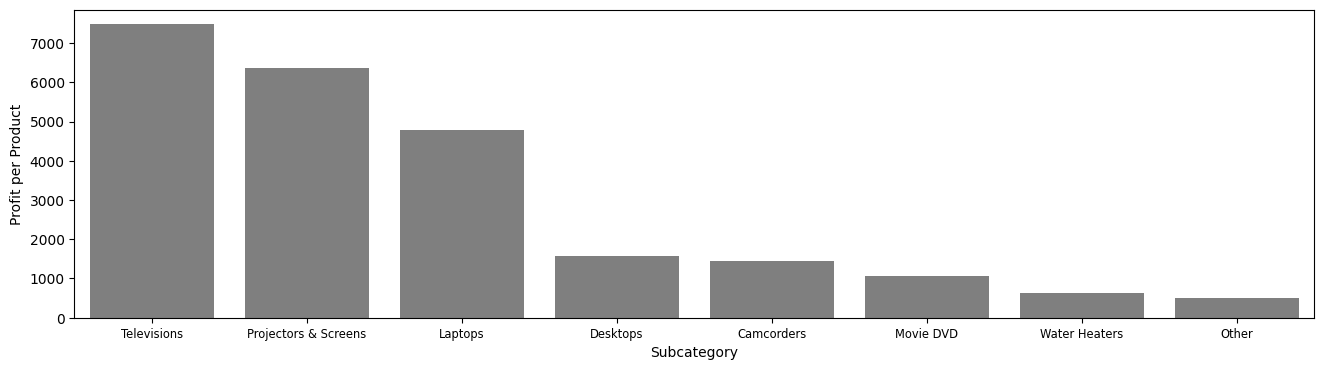

In [698]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x="Subcategory", y="Profit per Product", data=Sales_by_subcategory, color='black', alpha=0.5,order=order_of_bars, errorbar=None)#[["Profit per Product", "Subcategory"]].sort_values(by = "Profit per Product", ascending=False) 